For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [149]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

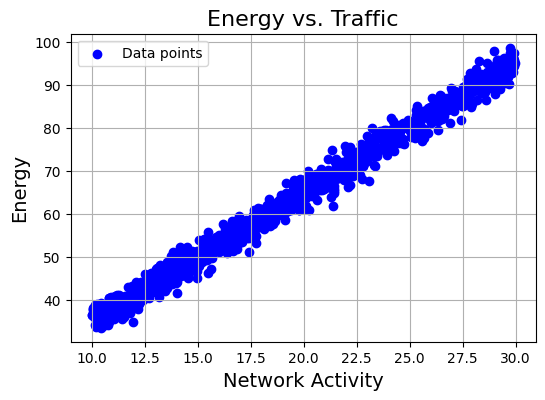

In [151]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

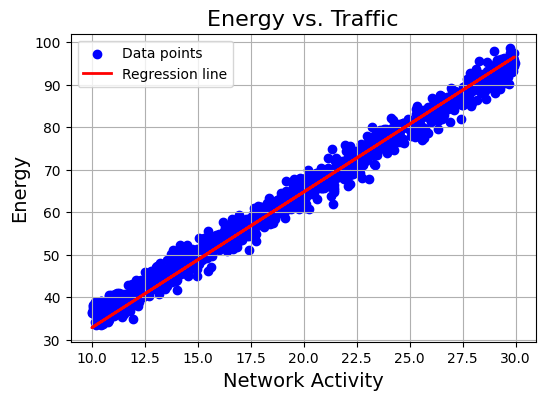

Regression model: 3.19694323X + 0.81383402


In [152]:
# linear regression
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'])

pred = lr.predict(data['Net_Activity'])

# plot
plt.figure(figsize=(6, 4))

plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], pred, c='red', label='Regression line', linewidth=2)

plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

print(f"Regression model: {lr.w[0]:.8f}X + {lr.b:.8f}")

### Discussion
#### a. Model
The result is the model as shown above, with the energy consumption formula being $E=3.19694323X + 0.81383402$

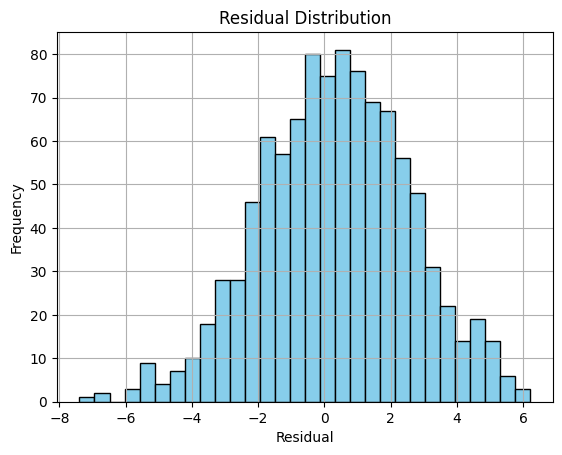

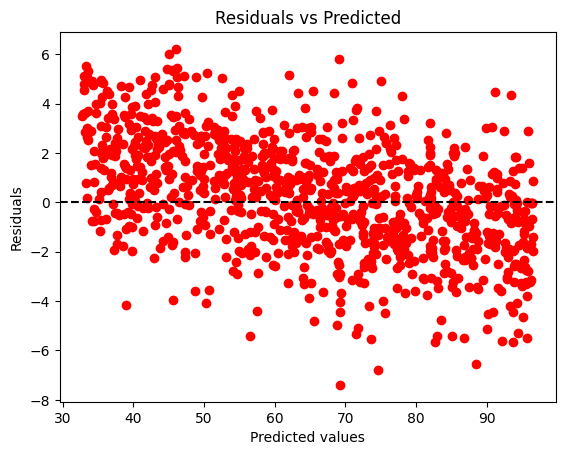

R^2: 0.98266002
Mean residual: 0.3079237015906515
MSE:  5.222556657783216


In [153]:
from sklearn.metrics import mean_squared_error

# plot residuals

residuals = data['Energy'] - pred

# histogram
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.grid(True)
plt.show()

# scatter
plt.scatter(pred, residuals, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()


# R^2
n = len(data['Energy'])      # number of samples
p = 1                        # number of features

# Compute R^2
ss_res = np.sum((data['Energy'] - pred)**2) # residual sum of squares
ss_tot = np.sum((data['Energy'] - np.mean(data['Energy']))**2) # total sum of squares
r2 = 1 - ss_res/ss_tot

print(f"R^2: {r2:.8f}")
print("Mean residual:", np.mean(residuals))
print("MSE: ", mean_squared_error(data['Energy'], pred))


#### b. Evaluation

Plotted histogram and scatter plot of residuals.
In the scatter plot the residuals should be placed randomly around the horizontal axis and should show no trend. The figure above shows the plot, and the residuals seem to be be centered around the horizontal axis with a slight negative slope, meaning it slightly overestimates high values and underestimates lower values.

Calulcated mean residual to be $0.30792370$, which is closer to zero as it should be, meaning it is generally unbiased on average. This is also showed through the histogram of residuals, where it has a rough bell shape and is centered around 0.

Also calculated $R^2$ which should be as close to 1 as possible and represents how much of the variance in the feature is explained by the model. Did not calculate $R^2$ because it is more applicable to multipple regression, and this model has one feature. 
Got $R^2: 0.98266002$ which means the models predictions are close to the actual values. As well as a low MSE value.

An unbiased estimator is when its expected value is equal the the value of the parameter it estimates. Meaning on average, the prediction is correct. In this cause you could say it is roughly unbiased, altough there is still room for improvements.



## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeregressor`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

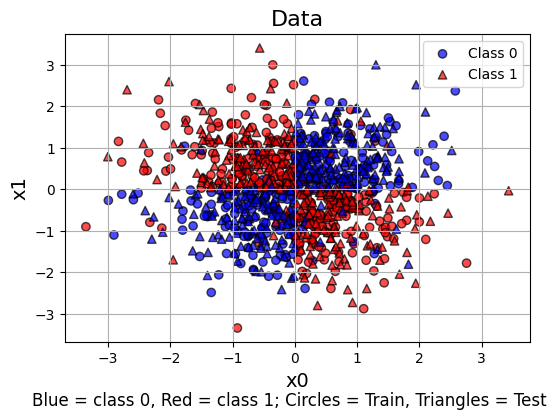

Total: train = 500, test = 500 


In [154]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

def add_polynomial_features(X):
    x0 = X[:, 0]
    x1 = X[:, 1]
    return np.column_stack([
        x0,
        x1,
        x0**2,
        x1**2,
        x0 * x1
    ])

# Scale
X_train = np.column_stack([
    (train["x0"] - train["x0"].mean()) / train["x0"].std(),
    (train["x1"] - train["x1"].mean()) / train["x1"].std()
])

Y_train = train["y"].values

X_test = np.column_stack([
    (test["x0"] - train["x0"].mean()) / train["x0"].std(),
    (test["x1"] - train["x1"].mean()) / train["x1"].std()
])

Y_test = test["y"].values

# Add polynomial feature
X_train_poly = add_polynomial_features(X_train)
X_test_poly  = add_polynomial_features(X_test)

X_train_poly[:, 2:4] = (X_train_poly[:, 2:4] - X_train_poly[:, 2:4].mean(axis=0)) / X_train_poly[:, 2:4].std(axis=0)
X_test_poly[:, 2:]  = (X_test_poly[:, 2:] - X_train_poly[:, 2:].mean(axis=0)) / X_train_poly[:, 2:].std(axis=0)

# Add weights to features
X_train_poly[:, 4] *= 2.0
X_test_poly[:, 4]  *= 2.0


# Plotting data
plt.figure(figsize=(6, 4))

# Training data
plt.scatter(
    train["x0"], train["x1"],
    c=train["y"], cmap='bwr', alpha=0.7, edgecolor="k", label="Class 0"
)

# Test data
plt.scatter(
    test["x0"], test["x1"],
    c=test["y"], cmap='bwr', alpha=0.7, edgecolor="k", marker="^", label="Class 1"
)

plt.grid(True)
plt.xlabel('x0', fontsize=14)
plt.ylabel('x1', fontsize=14)
plt.title('Data', fontsize=16)
plt.legend()

plt.figtext(0.5, -0.05, 'Blue = class 0, Red = class 1; Circles = Train, Triangles = Test', 
            ha='center', fontsize=12)

plt.show()

print(f"Total: train = {len(train)}, test = {len(test)} ")

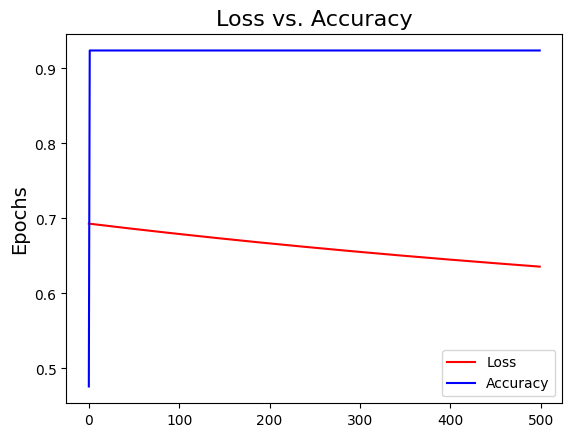

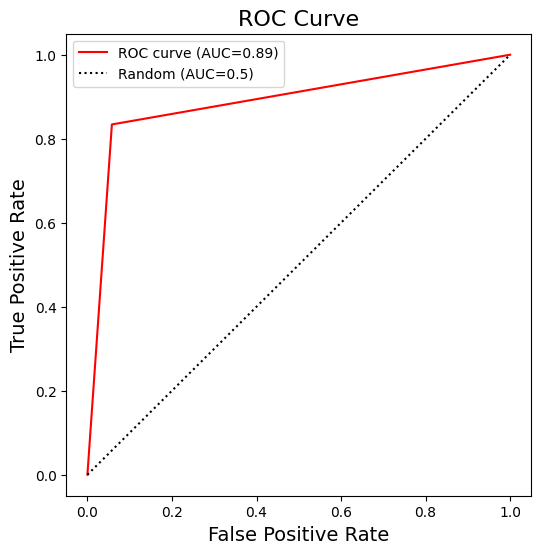

Accuracy:  0.89
MSE:  0.11


In [155]:
from sklearn.metrics import roc_curve, roc_auc_score
from logistic_regression import LogisticRegression

# Implementation of Logistic Regression 
log_reg = LogisticRegression()
log_reg.fit(X_train_poly, Y_train)

pred = log_reg.predict(X_test_poly)

# Plot Learning curve
train_epochs = log_reg.epochs

epoch_list = np.arange(0, train_epochs,1)
plt.plot(epoch_list, log_reg.loss, c='red', label="Loss")
plt.plot(epoch_list, log_reg.train_accuracies, c='blue', label="Accuracy")
plt.ylabel('Epochs', fontsize=14)
plt.title('Loss vs. Accuracy', fontsize=16)
plt.legend()
plt.show()

# ROC
fpr, tpr, thresholds = roc_curve(Y_test, pred, pos_label=1)
auc_score = round(roc_auc_score(Y_test, pred),2)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC={auc_score})", color="red")
plt.plot([0,1], [0,1], color="black", linestyle="dotted", label="Random (AUC=0.5)")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("ROC Curve", fontsize=16)
plt.legend()
plt.show()

print("Accuracy: ", log_reg.accuracy(Y_test, pred))
print("MSE: ", mean_squared_error(Y_test, pred))


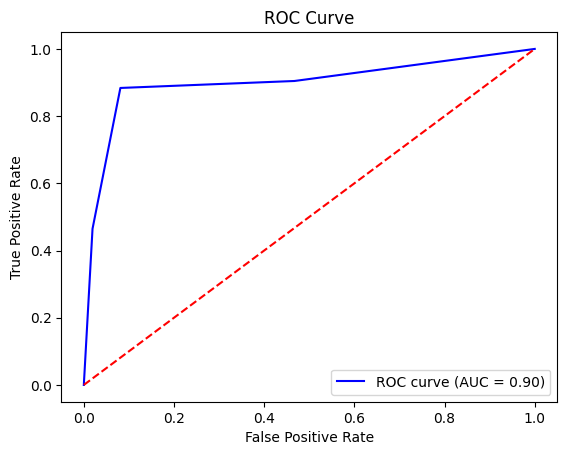

MSE:  0.08860147791062328


In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc

# Tree
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, Y_train)
Y_probs = tree.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, thresholds = roc_curve(Y_test,Y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("MSE: ", mean_squared_error(Y_test, Y_probs))

### Discussion

#### a. Initial poor performance
At first the model had an accurancy around 50 no matter how I tweaked the hypervariables, basically meaning it guessed. The loss vs. accurancy plot showed 2 straight horizontal lines meaning the model was not learning and improving.

After looking more closely at the data I realized why. The classes are separated into the four quadrants of the coordinate system centered around origo in a XOR way. Meaning no straight line would be able to separate those cleanly, which was what my model was trying to do.

To fix this I added polynomial features to my data, so it could set boundaries other than that of a straight line. Another improvements was removing the normalization I was initially doing to the data after scaling it. This works as the data is already had a strong natural separation which was weakened by the normalization. The final change was adding weights to the two features as this helped the gradient descent updates focus more on the features and their interaction.

#### b. Inductive bias of model
An inductive bias for a model is what kind of assumption it makes about the patterns of the data. This matters as it influences how the model approaches a problem and the descisions it makes when making predictions. In this case the inductive bias of gradient descent is that there is a hyperplane that separates the two classes. Which was not the case for our data, hence the initial poor results.

#### c. Using decision tree
Decision trees create rectangular boxes as decision boundaries. This is because each split separtes the data based on a feature threshold, drawing a line. This fits the XOR data as the different classes are separated into the coordinate system quadrants. So yes it can solve the problem as long as depth is more than 1, where it can draw only one boundary line, which in our case would still give it a 50-50% chance of either class. Found that depth 2 gave good esults with AUC $= 0.90$. Depth higher than 2 did no major change to AUC while also making the tree more complicated and can cause overfit. This was overall a more suitable method for the data, and required lot less tweaking and preprosessing of data to acheive decent results. 

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

Best accuracy: 0.795625 , feature: data_stream_3 

Best ROC AUC: 0.7278781516651579
Best hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1}
Accurancy on test set:  0.809


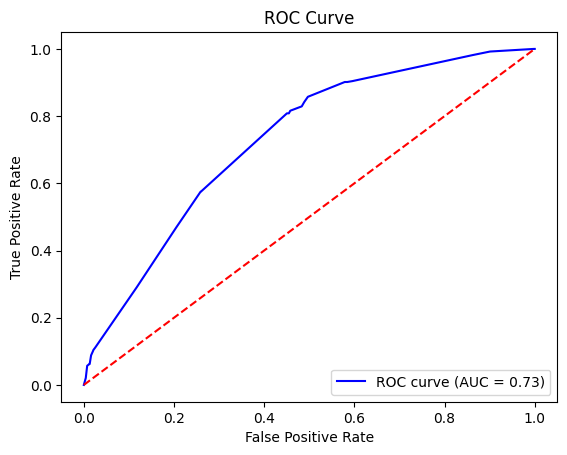

In [157]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import ParameterGrid

train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

feature_cols = [f"data_stream_{i}" for i in range(11)]
Y_train = train["target"] 
Y_test = test["target"]

best_score = 0
feature = ""

# Decrypt features, choose best one
for f in feature_cols:
  data = (train[f]*1e6).astype(int) % 2
  current_score = 0
  
  for i in range(len(data)):
    if data[i] == Y_train[i]:
      current_score += 1
  
  accuracy = current_score / len(data)

  if accuracy > best_score:
    best_score = accuracy
    feature = f

print("Best accuracy:", best_score, ", feature:", feature, "\n")

# Transform data
X_train = train.iloc[:, :-1]
X_test  = test.iloc[:, :-1]

X_train[feature] = (X_train[feature]*1e3).astype(int) % 2
X_test[feature]  = (X_test[feature]*1e3).astype(int) % 2

# Find best hyperparameters
param_grid = {
    "max_depth": [3, 5, 8, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": [None, "sqrt", "log2"],
    "criterion": ["gini", "entropy"]
}

best_auc = 0
best_params = None

for params in ParameterGrid(param_grid):
    tree = DecisionTreeClassifier(
        random_state=42,
        **params
    )
    
    tree.fit(X_train, Y_train)
    
    Y_probs = tree.predict_proba(X_test)[:, 1]
    
    auc_score = roc_auc_score(Y_test, Y_probs)
    
    if auc_score > best_auc:
        best_auc = auc_score
        best_params = params

print("Best ROC AUC:", best_auc)
print("Best hyperparameters:", best_params)

# Make tree
tree = DecisionTreeClassifier(
    random_state=42,
    **best_params
)

tree.fit(X_train, Y_train)

# Predict probabilities
Y_probs = tree.predict_proba(X_test)[:, 1]

# ROC
fpr, tpr, thresholds = roc_curve(Y_test,Y_probs)
roc_auc = auc(fpr, tpr)

# Threshold, accurancy
threshold = 0.7
preds = (Y_probs >= threshold).astype(int)
acc = accuracy_score(Y_test, preds)
print("Accurancy on test set: ", acc)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()



### Random Forest regressor

Best ROC AUC: 0.731154214098144
Best hyperparameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 200}
Accurancy on test set:  0.807


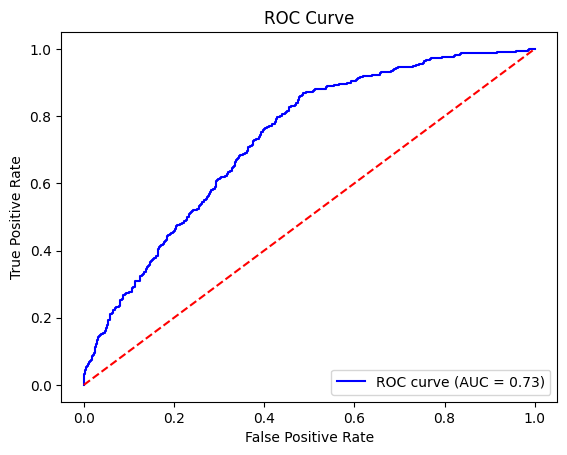

In [158]:
from sklearn.ensemble import RandomForestClassifier


train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

Y_train = train["target"] 
Y_test = test["target"]

X_train = train.iloc[:, :-1]
X_test  = test.iloc[:, :-1]

X_train[feature] = (X_train[feature]*1e3).astype(int) % 2
X_test[feature]  = (X_test[feature]*1e3).astype(int) % 2

# Tune hyperparameters

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [5, 8],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

best_score = 0
best_params = None

for params in ParameterGrid(param_grid):
    # Initialize classifier with current hyperparameters
    classifier = RandomForestClassifier(
        random_state=42,
        **params
    )
    
    classifier.fit(X_train, Y_train)
    
    Y_probs = classifier.predict_proba(X_test)[:, 1]
    
    preds = classifier.predict(X_test)
    score = roc_auc_score(Y_test, Y_probs)
    
    # Save best
    if score > best_score:
        best_score = score
        best_params = params

print("Best ROC AUC:", best_score)
print("Best hyperparameters:", best_params)

# Make classifier
classifier = RandomForestClassifier(
    random_state=42,
    **params
)

classifier.fit(X_train, Y_train)
Y_probs = classifier.predict_proba(X_test)[:, 1] 


# ROC
fpr, tpr, thresholds = roc_curve(Y_test,Y_probs)
roc_auc = auc(fpr, tpr)

# Thresholds
threshold = 0.7
preds = (Y_probs >= threshold).astype(int)
acc = accuracy_score(Y_test, preds)
print("Accurancy on test set: ", acc)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


### Discussion

#### a. Threshold breaking strategy and hyperparameters
For the threshold I tried a couple different values, and ended up with $0.7$ which gave the best result. Though all in all the difference wasn't big between $0.5-0.8$. Did manual GridSearch to find the best combination of hyperparameters. Initially tried chaning one at the time, which was almost enough, but missed the interaction between them.

#### b. ROC and AUC usage
ROC curve plots the true positive rate (TPR) vs. the false positive rate (FPR). ROC AUC is the area under the curve and represents the probability that the model would rank a random positive sample higher than a random negative sample. Meaning AUC is the model's ranking ability for the classifier. However, it does not directly measure threshold-specific accuracy and can be insensitive to imbalanced dataset where it could predict the minority poorly but still get a high AUC score. So it should not be used alone to evaluate a model, but is a good indicator.

With the Decision tree model, the ROC AUC ended up at $0.73$ after some tuning, while the actual accuracy of the model was higher at $0.81$. Ideally you would want the curve to rise towards the top left quickly as this means high TPR while keeping FPR low. In this case $TPR>FPR$, and rises above diagonal quickly. It's generally good at ranking positives higher than negatives. Though there is a trade off between TPR and FPR, meaning higher TPR also increases FPR.

#### c. Random Forest Classifier results
So prosses data same way as for the decision tree and got ROC curve and AUC similar to the tree. The ROC curve looks pretty much identical to the one for the Decision tree. It uses the average probability over many trees, barely improving AUC in this case. If anything it looks like it has a slightly higher TPR to FPR rate at the beginning, but the difference is barley noticable. The accuracy of the model is pretty much the same as the Decision tree.

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [259]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

target = "nexus_rating"

feature_cols = train.columns.to_list()

# Check mising values
print("Data overview:")
for f in feature_cols:
    miss_train = train[f].isnull().any()
    miss_test = test[f].isnull().any()
    #print(f"Train {f}: Min: {train[f].min()}, max: {train[f].max()}, missing: {miss_train}")
    #print(f"Test {f}: Min: {test[f].min()}, max: {test[f].max()}, missing: {miss_test}\n")
        

# Adding a new "type" for missing ownership_type
new_ownership_type = train["ownership_type"].max() + 1
train['ownership_type'] = train['ownership_type'].fillna(new_ownership_type)
test['ownership_type'] = test['ownership_type'].fillna(new_ownership_type)

# Set placeholders as -9999 for missing values
for f in feature_cols:
    median = train[f].median()
    train[f] = train[f].fillna(median)
    test[f] = test[f].fillna(median)
    
# Scaling train nexus_rating
scale = train[target].median() / test[target].median()
print("Scale factor:", scale)
train[target] = train[target] / scale

# Scale test grid_connections and adding categories to train set
scale = np.median(test[f]) / np.median(train[f][train[f] > 0])
f = 'grid_connections'
test[f] = (test[f] / scale).round().astype(int)

# Examine data and add categories
#print(f"{f} Min: {test[f].min()}, max: {test[f].max()}")
#print("Train unique:", train[f].unique())
#print("Test unique:", test[f].unique())

train[f] = train[f].astype(int).astype('category')
test[f] = test[f].astype(int).astype('category')

all_cats = list(set(train[f].cat.categories) | set(test[f].cat.categories))
train[f] = train[f].cat.set_categories(all_cats)
test[f] = test[f].cat.set_categories(all_cats)

# Clip outliers in columns

for f in feature_cols[2:9]:
    # Only process numeric features
    
    if train[f].dtype.kind not in 'iuf':
        continue
    
    # Clip train values based on test percentiles
    lower = test[f].quantile(0.01)  # or 0.00 for true min
    upper = test[f].quantile(0.90)
    
    train[f] = train[f].clip(lower, upper)

for f in feature_cols:
    if train[f].dtype.kind not in 'iuf':
        continue
    train_max = train[f].max()
    test_max = test[f].max()

    # Case 1: train exceeds test max → clip upper
    if train_max > test_max:
        train[f] = train[f].clip(upper=test_max)
        
    if train_max < test_max:
        test[f] = test[f].clip(upper=train_max)
    
    # Optional: scale train to match test median
    if(train[f].median() == 0):
        scale_factor = test[f].median() / 1e-6
    else:
        scale_factor = test[f].median() / train[f].median()
    train[f] = train[f] * scale_factor

for f in feature_cols:	
	print(train[f].describe())
	print(test[f].describe())


X_train = train.drop(target, axis=1)
Y_train = train[target]
Y_train = np.log1p(Y_train)

X_test = test.drop(target, axis=1)
Y_test = test[target]


Data overview:
Scale factor: 178607.39932885906
count    23285.000000
mean         2.681254
std          1.341370
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: ownership_type, dtype: float64
count    9937.000000
mean        2.676260
std         1.366051
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: ownership_type, dtype: float64
count    23285.000000
mean       122.863309
std        177.380862
min          5.038985
25%         41.935553
50%         59.600000
75%        114.776880
max       1175.000000
Name: nexus_rating, dtype: float64
count    9937.000000
mean       75.144219
std        56.359318
min        13.000000
25%        42.400000
50%        59.600000
75%        86.000000
max      1175.000000
Name: nexus_rating, dtype: float64
count    23285.000000
mean        11.413565
std          2.432614
min          2.068395
25%          9.341137
50%       

In [162]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [260]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Trying Random Forest Regressor
regressor = RandomForestRegressor(
    n_estimators=500,
    max_depth=20,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
regressor.fit(X_train, Y_train)

Y_preds = regressor.predict(X_test)
Y_preds = np.expm1(Y_preds)
Y_preds = np.maximum(Y_preds, 0)

print("R2:", r2_score(Y_test, Y_preds))
print("MSE:", mean_squared_error(Y_test, Y_preds))
print("RMSLE:", rmsle(Y_test, Y_preds))

R2: -1.362812247337367
MSE: 7504.417128599657
RMSLE: 0.5869550655682934


In [261]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

# Trying Gradient Boosting using LightGBM

param_grid = {
    'num_leaves': [31, 63, 127],
    'max_depth': [-1, 5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [500, 1000, 1500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


model = LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
"""
model = LGBMRegressor(
    random_state=42
)

search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,            
    scoring='neg_mean_squared_log_error',  # RMSLE proxy
    cv=3,
    verbose=2,
    n_jobs=-1
)"""


categorical_features = ['ownership_type', 'grid_connections']
model.fit(
    X_train, Y_train,
    categorical_feature=categorical_features
)

Y_preds = model.predict(X_test)
Y_preds = np.expm1(Y_preds)
Y_preds = np.maximum(Y_preds, 0)


print("R2:", r2_score(Y_test, Y_preds))
print("MSE:", mean_squared_error(Y_test, Y_preds))
print("RMSLE:", rmsle(Y_test, Y_preds))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 656
[LightGBM] [Info] Number of data points in the train set: 23285, number of used features: 14
[LightGBM] [Info] Start training from score 4.350216
R2: -0.9583258264858492
MSE: 6219.746783613633
RMSLE: 0.55481180741891


Text(0, 0.5, 'Count')

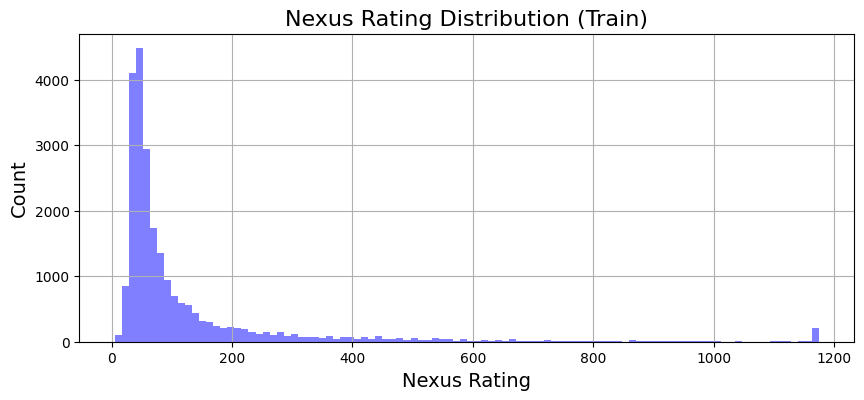

In [249]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [250]:
# Example rmsle check
print('RMSLE: ', rmsle(Y_test, Y_preds))
print('Required RMSLE: ', 0.294)

RMSLE:  0.55481180741891
Required RMSLE:  0.294


   ### Discussion
   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?
   
   RMSLE is an extension of MSE, and is mainly used when predictions have large deviations

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 